In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-

<AxesSubplot:xlabel='Survived', ylabel='count'>

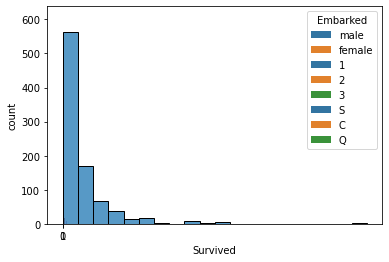

In [3]:
titanic_df.info()

titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

titanic_df.info()

sns.countplot(x='Survived',data=titanic_df)

sns.countplot(x='Survived',hue='Sex',data=titanic_df)

sns.countplot(x='Survived',hue='Pclass',data=titanic_df)

sns.countplot(x='SibSp',data=titanic_df)

sns.countplot(x='Survived',hue='Embarked',data=titanic_df)

sns.histplot(x='Fare',data=titanic_df, bins=20)


In [4]:
gender = pd.get_dummies(titanic_df['Sex'],drop_first=True)
embark_location = pd.get_dummies(titanic_df['Embarked'],drop_first=True)
titanic_df.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_df = pd.concat([titanic_df,gender,embark_location],axis=1)
titanic_df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [5]:
X = titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [6]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [7]:
predictions = logmodel.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test,predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7835820895522388
Confusion Matrix:
 [[135  19]
 [ 39  75]]


In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [9]:
predictions = dtree.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test,predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.75
Confusion Matrix:
 [[129  25]
 [ 42  72]]


In [10]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [13]:
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8022388059701493
Confusion Matrix:
 [[134  20]
 [ 33  81]]
